In [1]:

# L02: Exploring Deep Learning Tools - Interactive Notebook
# A No-Code Introduction to TensorFlow and Keras with VGG16

# ========================================================================
# ACTIVITY 1: INTRODUCTION
# ========================================================================

"""
# 🧠 Welcome to Deep Learning!

## What is Deep Learning?
Deep learning is a subset of machine learning that uses neural networks with
multiple layers (hence "deep") to learn patterns from data. It's particularly
powerful for tasks like image recognition, speech recognition, and natural
language processing.

## What You'll Learn Today:
1. How pre-trained neural networks work
2. The architecture of VGG16, a classic image classification model
3. How to preprocess images for deep learning
4. How models make predictions
5. How input variations affect predictions

## About VGG16:
VGG16 is a convolutional neural network trained on ImageNet, a dataset with
over 1 million images across 1,000 categories. Despite being from 2014, it
remains an excellent teaching tool and practical baseline model.

## No Coding Required!
Simply run each cell (click the play button) and observe the outputs.
Focus on understanding the concepts rather than the code syntax.

Ready? Let's begin! 🚀
"""

'\n# 🧠 Welcome to Deep Learning!\n\n## What is Deep Learning?\nDeep learning is a subset of machine learning that uses neural networks with\nmultiple layers (hence "deep") to learn patterns from data. It\'s particularly\npowerful for tasks like image recognition, speech recognition, and natural\nlanguage processing.\n\n## What You\'ll Learn Today:\n1. How pre-trained neural networks work\n2. The architecture of VGG16, a classic image classification model\n3. How to preprocess images for deep learning\n4. How models make predictions\n5. How input variations affect predictions\n\n## About VGG16:\nVGG16 is a convolutional neural network trained on ImageNet, a dataset with\nover 1 million images across 1,000 categories. Despite being from 2014, it\nremains an excellent teaching tool and practical baseline model.\n\n## No Coding Required!\nSimply run each cell (click the play button) and observe the outputs.\nFocus on understanding the concepts rather than the code syntax.\n\nReady? Let\'s 

In [2]:
# ========================================================================
# SETUP: Install and Import Required Libraries
# ========================================================================

print("📦 Installing required packages...")
print("This may take 1-2 minutes on first run.\n")

# Install required packages
import sys
!{sys.executable} -m pip install -q tensorflow pillow matplotlib numpy ipywidgets

print("✅ Packages installed successfully!\n")

# Import libraries
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import io
import requests
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets

print("🔧 TensorFlow version:", tf.__version__)
print("✅ All libraries imported successfully!\n")


📦 Installing required packages...
This may take 1-2 minutes on first run.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.0 MB/s eta 0:00:00
✅ Packages installed successfully!

🔧 TensorFlow version: 2.19.0
✅ All libraries imported successfully!



LOADING VGG16 MODEL

⏳ Loading pre-trained VGG16 model...
   (This downloads ~528MB on first run)

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
✅ Model loaded successfully!

MODEL ARCHITECTURE SUMMARY

This shows all layers in the network:



Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)


KEY OBSERVATIONS:

📊 Total Parameters: 138,357,544
📥 Input Shape: (None, 224, 224, 3)
📤 Output Shape: (None, 1000) (1000 classes)

🔍 Layer Pattern:
   • Convolutional layers: Extract features (edges, textures, patterns)
   • MaxPooling layers: Reduce spatial dimensions
   • Flatten layer: Convert 2D features to 1D
   • Dense layers: Make final classification decisions


📊 Creating architecture visualization...


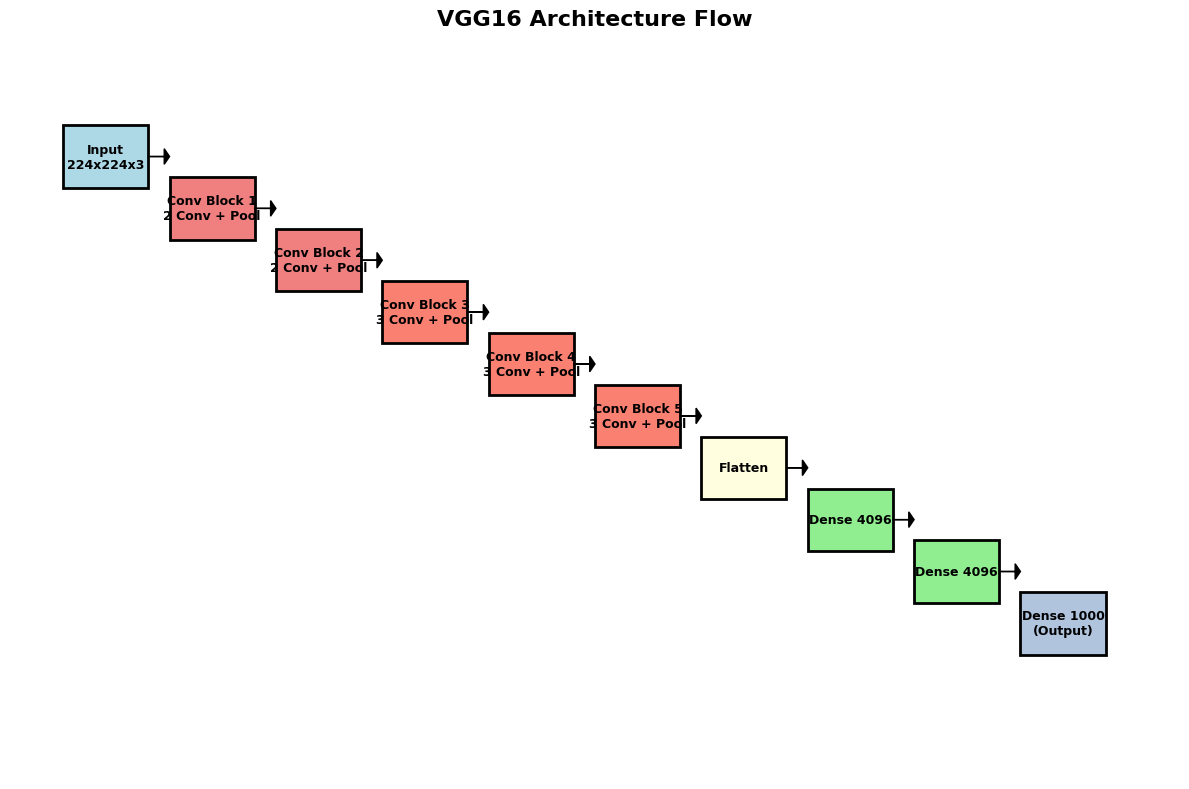


✏️ REFLECTION PROMPT:
   What pattern do you notice in the architecture?
   How does information flow from input to output?


In [3]:
# ========================================================================
# ACTIVITY 2: OVERVIEW OF THE PRE-BUILT MODEL
# ========================================================================

"""
## 🏗️ Activity 2: Exploring the VGG16 Architecture

VGG16 consists of:
- 16 layers with learnable parameters
- 13 convolutional layers (extract features)
- 3 fully connected layers (make decisions)
- Over 138 million parameters!

Run the cell below to load the model and see its architecture.
"""

print("=" * 70)
print("LOADING VGG16 MODEL")
print("=" * 70)
print("\n⏳ Loading pre-trained VGG16 model...")
print("   (This downloads ~528MB on first run)\n")

# Load pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=True)

print("✅ Model loaded successfully!\n")
print("=" * 70)
print("MODEL ARCHITECTURE SUMMARY")
print("=" * 70)
print("\nThis shows all layers in the network:\n")

# Display model summary
model.summary()

print("\n" + "=" * 70)
print("KEY OBSERVATIONS:")
print("=" * 70)
print(f"""
📊 Total Parameters: {model.count_params():,}
📥 Input Shape: {model.input_shape}
📤 Output Shape: {model.output_shape} (1000 classes)

🔍 Layer Pattern:
   • Convolutional layers: Extract features (edges, textures, patterns)
   • MaxPooling layers: Reduce spatial dimensions
   • Flatten layer: Convert 2D features to 1D
   • Dense layers: Make final classification decisions
""")

# Visualize model architecture
print("\n📊 Creating architecture visualization...")

def plot_model_architecture():
    fig, ax = plt.subplots(figsize=(12, 8))

    layers_info = [
        ("Input\n224x224x3", 0.5, 9, "lightblue"),
        ("Conv Block 1\n2 Conv + Pool", 1.5, 8.5, "lightcoral"),
        ("Conv Block 2\n2 Conv + Pool", 2.5, 8, "lightcoral"),
        ("Conv Block 3\n3 Conv + Pool", 3.5, 7.5, "salmon"),
        ("Conv Block 4\n3 Conv + Pool", 4.5, 7, "salmon"),
        ("Conv Block 5\n3 Conv + Pool", 5.5, 6.5, "salmon"),
        ("Flatten", 6.5, 6, "lightyellow"),
        ("Dense 4096", 7.5, 5.5, "lightgreen"),
        ("Dense 4096", 8.5, 5, "lightgreen"),
        ("Dense 1000\n(Output)", 9.5, 4.5, "lightsteelblue"),
    ]

    for layer_name, x, y, color in layers_info:
        ax.add_patch(plt.Rectangle((x, y-0.3), 0.8, 0.6,
                                   facecolor=color, edgecolor='black', linewidth=2))
        ax.text(x+0.4, y, layer_name, ha='center', va='center',
                fontsize=9, fontweight='bold')

        if x < 9.5:
            ax.arrow(x+0.8, y, 0.15, 0, head_width=0.15,
                    head_length=0.05, fc='black', ec='black')

    ax.set_xlim(0, 11)
    ax.set_ylim(3, 10)
    ax.axis('off')
    ax.set_title('VGG16 Architecture Flow', fontsize=16, fontweight='bold', pad=20)

    plt.tight_layout()
    plt.show()

plot_model_architecture()

print("\n✏️ REFLECTION PROMPT:")
print("   What pattern do you notice in the architecture?")
print("   How does information flow from input to output?")



ACTIVITY 3: DATA PREPROCESSING DEMONSTRATION

📥 Loading sample image from internet...
⚠️ Could not load online image, using placeholder



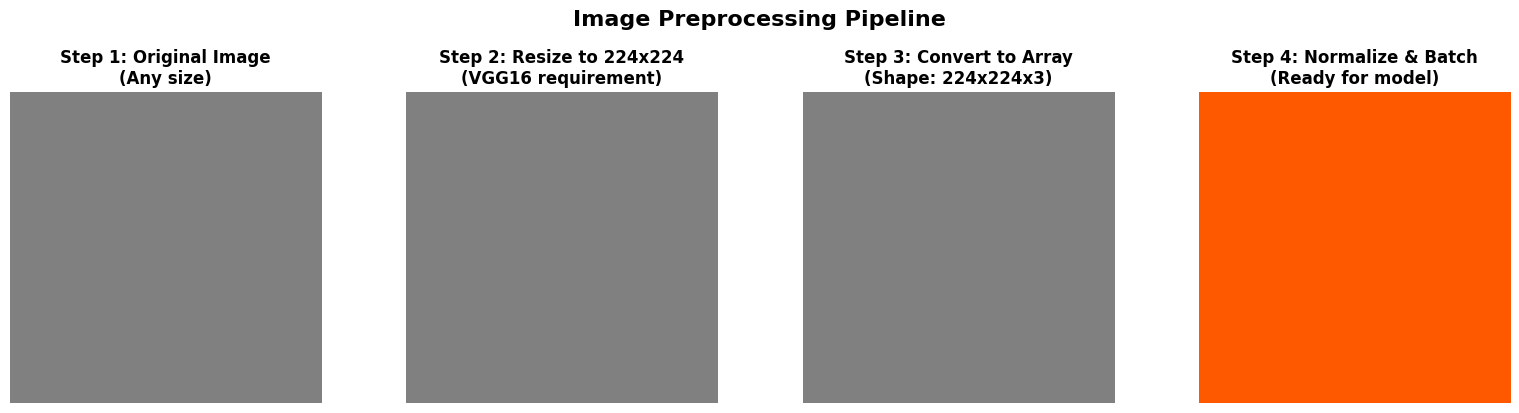


📋 PREPROCESSING DETAILS:

Original size: (224, 224)
After resize: (224, 224)
Array shape: (224, 224, 3)
After batching: (1, 224, 224, 3)
After preprocessing: (1, 224, 224, 3)

🔢 Pixel value ranges:
   Original: 0-255 (RGB values)
   After preprocessing: 4.32 to 24.06

✏️ REFLECTION PROMPT:
   Why do you think all images must be the same size?
   What might happen if we skip normalization?


In [4]:
# ========================================================================
# ACTIVITY 3: DATA LOADING AND PREPROCESSING
# ========================================================================

"""
## 🖼️ Activity 3: Understanding Data Preprocessing

Before feeding images to a neural network, we must preprocess them:

1. **Resize**: VGG16 requires 224x224 pixel images
2. **Normalize**: Scale pixel values appropriately
3. **Batch**: Add dimension for batch processing

This ensures the model receives data in the format it expects.
"""

print("\n" + "=" * 70)
print("ACTIVITY 3: DATA PREPROCESSING DEMONSTRATION")
print("=" * 70)

# Load a sample image from URL
print("\n📥 Loading sample image from internet...")

sample_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/481px-Cat03.jpg"

try:
    response = requests.get(sample_url)
    sample_img = Image.open(io.BytesIO(response.content))
    print("✅ Sample image loaded: Cat image\n")
except:
    print("⚠️ Could not load online image, using placeholder\n")
    sample_img = Image.new('RGB', (224, 224), color='gray')

# Display preprocessing steps
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Step 1: Original image
axes[0].imshow(sample_img)
axes[0].set_title('Step 1: Original Image\n(Any size)', fontweight='bold')
axes[0].axis('off')

# Step 2: Resize
img_resized = sample_img.resize((224, 224))
axes[1].imshow(img_resized)
axes[1].set_title('Step 2: Resize to 224x224\n(VGG16 requirement)', fontweight='bold')
axes[1].axis('off')

# Step 3: Convert to array
img_array = image.img_to_array(img_resized)
axes[2].imshow(img_array.astype('uint8'))
axes[2].set_title('Step 3: Convert to Array\n(Shape: 224x224x3)', fontweight='bold')
axes[2].axis('off')

# Step 4: Preprocess
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch.copy())
# Show normalized version (rescale for display)
display_img = (img_preprocessed[0] - img_preprocessed[0].min()) / \
              (img_preprocessed[0].max() - img_preprocessed[0].min())
axes[3].imshow(display_img)
axes[3].set_title('Step 4: Normalize & Batch\n(Ready for model)', fontweight='bold')
axes[3].axis('off')

plt.suptitle('Image Preprocessing Pipeline', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n📋 PREPROCESSING DETAILS:")
print(f"""
Original size: {sample_img.size}
After resize: (224, 224)
Array shape: {img_array.shape}
After batching: {img_batch.shape}
After preprocessing: {img_preprocessed.shape}

🔢 Pixel value ranges:
   Original: 0-255 (RGB values)
   After preprocessing: {img_preprocessed.min():.2f} to {img_preprocessed.max():.2f}
""")

print("✏️ REFLECTION PROMPT:")
print("   Why do you think all images must be the same size?")
print("   What might happen if we skip normalization?")



ACTIVITY 4: IMAGE CLASSIFICATION

🔍 Testing with sample cat image...

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


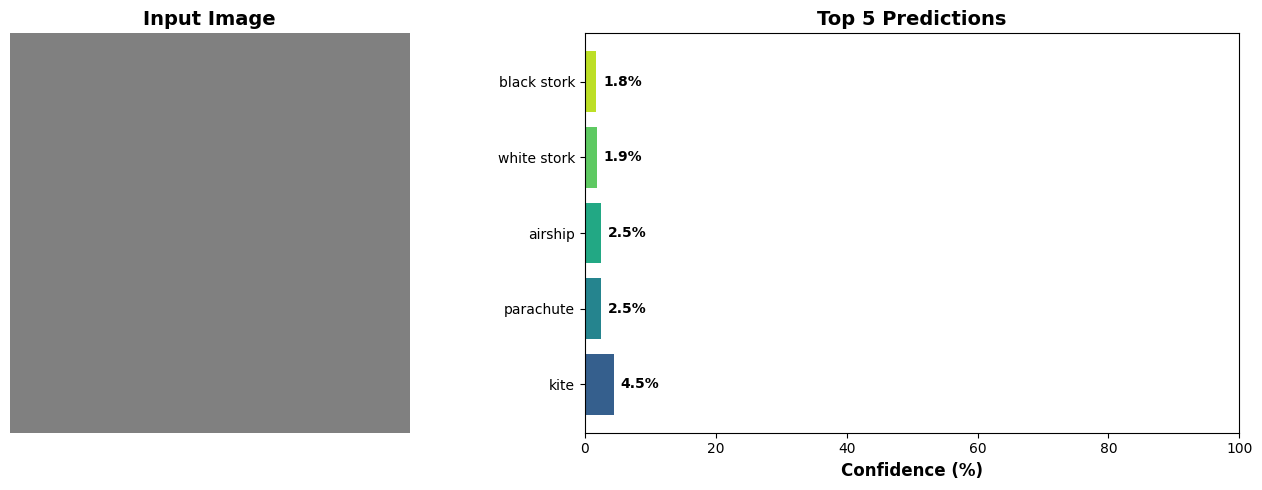


📊 DETAILED PREDICTIONS:
----------------------------------------------------------------------
1. Kite                           -  4.48%
2. Parachute                      -  2.48%
3. Airship                        -  2.46%
4. White Stork                    -  1.87%
5. Black Stork                    -  1.77%
----------------------------------------------------------------------

🎨 TRY YOUR OWN IMAGES!

Or try these sample images:


Output()


✏️ REFLECTION PROMPT:
   Were the predictions accurate?
   What categories does the model seem to handle well?
   Record your results in the reflection journal!


In [5]:
# ========================================================================
# ACTIVITY 4: MAKING PREDICTIONS
# ========================================================================

"""
## 🎯 Activity 4: Making Predictions with VGG16

Now for the exciting part! Let's see how the model classifies images.
You can use the sample images provided or upload your own.
"""

print("\n" + "=" * 70)
print("ACTIVITY 4: IMAGE CLASSIFICATION")
print("=" * 70)

# Prediction function
def predict_image(img_pil, show_plot=True):
    """Make prediction on a PIL Image"""
    # Preprocess
    img_resized = img_pil.resize((224, 224))
    img_array = image.img_to_array(img_resized)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)

    # Predict
    predictions = model.predict(img_preprocessed, verbose=0)
    decoded = decode_predictions(predictions, top=5)[0]

    # Display results
    if show_plot:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

        # Show image
        ax1.imshow(img_resized)
        ax1.set_title('Input Image', fontsize=14, fontweight='bold')
        ax1.axis('off')

        # Show predictions
        labels = [f"{pred[1].replace('_', ' ')}" for pred in decoded]
        confidences = [pred[2] * 100 for pred in decoded]
        colors = plt.cm.viridis(np.linspace(0.3, 0.9, 5))

        bars = ax2.barh(labels, confidences, color=colors)
        ax2.set_xlabel('Confidence (%)', fontsize=12, fontweight='bold')
        ax2.set_title('Top 5 Predictions', fontsize=14, fontweight='bold')
        ax2.set_xlim(0, 100)

        # Add percentage labels
        for i, (bar, conf) in enumerate(zip(bars, confidences)):
            ax2.text(conf + 1, i, f'{conf:.1f}%',
                    va='center', fontweight='bold')

        plt.tight_layout()
        plt.show()

    return decoded

# Test with sample image
print("\n🔍 Testing with sample cat image...\n")
results = predict_image(sample_img)

print("\n📊 DETAILED PREDICTIONS:")
print("-" * 70)
for i, (imagenet_id, label, confidence) in enumerate(results, 1):
    print(f"{i}. {label.replace('_', ' ').title():30s} - {confidence*100:5.2f}%")
print("-" * 70)

# Interactive uploader widget
print("\n" + "=" * 70)
print("🎨 TRY YOUR OWN IMAGES!")
print("=" * 70)

# Sample image gallery
print("\nOr try these sample images:")

sample_images = {
    "Golden Retriever": "https://upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Golden_Retriever_Dukedestiny01_drvd.jpg/360px-Golden_Retriever_Dukedestiny01_drvd.jpg",
    "Airplane": "https://upload.wikimedia.org/wikipedia/commons/thumb/2/2d/Airbus_A380_blue_sky.jpg/500px-Airbus_A380_blue_sky.jpg",
    "Pizza": "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/Eq_it-na_pizza-margherita_sep2005_sml.jpg/500px-Eq_it-na_pizza-margherita_sep2005_sml.jpg",
    "Coffee Cup": "https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/A_small_cup_of_coffee.JPG/450px-A_small_cup_of_coffee.JPG"
}

# Create dropdown and button
dropdown = widgets.Dropdown(
    options=list(sample_images.keys()),
    description='Image:',
    style={'description_width': 'initial'}
)

button = widgets.Button(
    description='🔍 Classify Image',
    button_style='success',
    layout=widgets.Layout(width='200px', height='40px')
)

output = widgets.Output()

def on_button_click(b):
    with output:
        clear_output(wait=True)
        selected = dropdown.value
        print(f"\n🔄 Loading and classifying: {selected}...\n")

        try:
            response = requests.get(sample_images[selected])
            img = Image.open(io.BytesIO(response.content))
            results = predict_image(img)

            print(f"\n✅ Classification complete!")
            print(f"\n🏆 Top Prediction: {results[0][1].replace('_', ' ').title()}")
            print(f"   Confidence: {results[0][2]*100:.1f}%")

        except Exception as e:
            print(f"❌ Error: {e}")

button.on_click(on_button_click)

display(widgets.HBox([dropdown, button]))
display(output)

print("\n✏️ REFLECTION PROMPT:")
print("   Were the predictions accurate?")
print("   What categories does the model seem to handle well?")
print("   Record your results in the reflection journal!")

## Loading a Local Image File for Prediction

To load an image file from your local machine or from the Colab environment's file system, you can use `PIL.Image.open()`.

Make sure you have uploaded your image file to your Colab session first using the file browser (folder icon on the left sidebar). Then, update the `local_image_path` variable with the path to your uploaded file.

✅ Local image loaded from: /content/Flower_garden.jpg



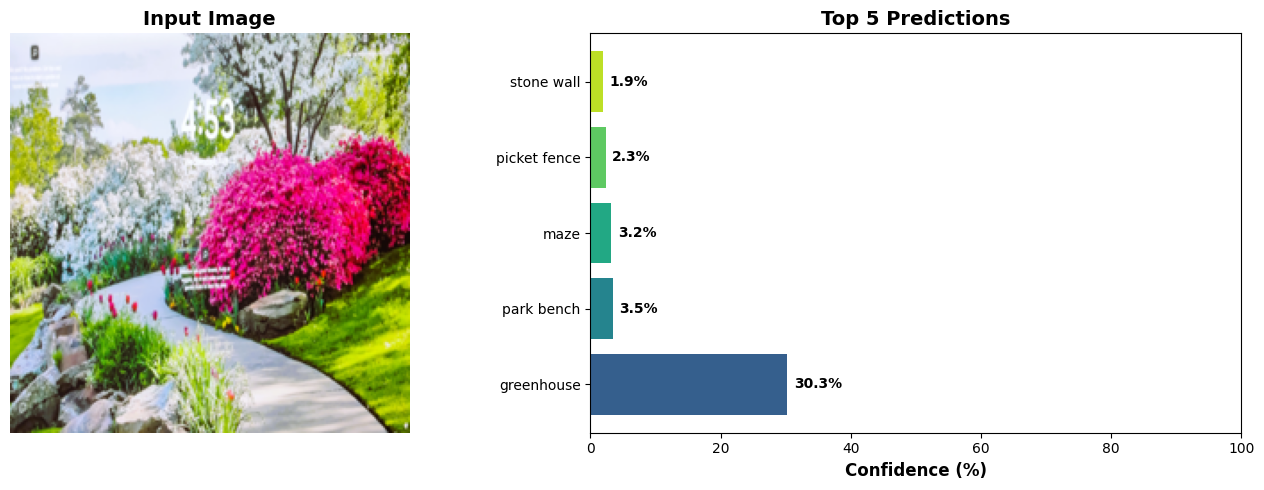


📊 DETAILED PREDICTIONS FOR LOCAL IMAGE:
----------------------------------------------------------------------
1. Greenhouse                     - 30.26%
2. Park Bench                     -  3.45%
3. Maze                           -  3.19%
4. Picket Fence                   -  2.34%
5. Stone Wall                     -  1.89%
----------------------------------------------------------------------


In [12]:
from PIL import Image

# Replace this with the actual path to your uploaded local image file
local_image_path = '/content/Flower_garden.jpg'

try:
    # Load the local image file
    local_img = Image.open(local_image_path)
    print(f"✅ Local image loaded from: {local_image_path}\n")

    # Get predictions for the local image
    local_image_results = predict_image(local_img)

    print("\n📊 DETAILED PREDICTIONS FOR LOCAL IMAGE:")
    print("-" * 70)
    for i, (imagenet_id, label, confidence) in enumerate(local_image_results, 1):
        print(f"{i}. {label.replace('_', ' ').title():30s} - {confidence*100:5.2f}%")
    print("-" * 70)

except FileNotFoundError:
    print(f"❌ Error: File not found at '{local_image_path}'. Please check the path or upload the file.")
except Exception as e:
    print(f"❌ An error occurred: {e}")

In [7]:
# ========================================================================
# ACTIVITY 5: UNDERSTANDING PREDICTIONS
# ========================================================================

"""
## 🔬 Activity 5: Testing Model Robustness

Let's explore how image modifications affect predictions.
We'll test:
1. Image rotation
2. Added noise
3. Brightness changes
"""

print("\n" + "=" * 70)
print("ACTIVITY 5: EXPLORING MODEL SENSITIVITY")
print("=" * 70)

# Load a clear sample image for experimentation
print("\n📥 Loading test image (Golden Retriever)...")
try:
    response = requests.get(sample_images["Golden Retriever"])
    test_img = Image.open(io.BytesIO(response.content))
    print("✅ Test image loaded\n")
except:
    test_img = sample_img
    print("⚠️ Using previous sample\n")

# Get baseline prediction
print("🎯 Baseline Prediction:")
print("-" * 70)
baseline_results = predict_image(test_img, show_plot=False)
baseline_label = baseline_results[0][1].replace('_', ' ').title()
baseline_conf = baseline_results[0][2] * 100
print(f"Prediction: {baseline_label}")
print(f"Confidence: {baseline_conf:.1f}%\n")

# Interactive experiment widget
print("=" * 70)
print("🧪 INTERACTIVE EXPERIMENTS")
print("=" * 70)

experiment_dropdown = widgets.Dropdown(
    options=['Rotation', 'Noise', 'Brightness', 'Blur'],
    description='Experiment:',
    style={'description_width': 'initial'}
)

intensity_slider = widgets.IntSlider(
    value=45,
    min=0,
    max=180,
    step=15,
    description='Intensity:',
    style={'description_width': 'initial'}
)

experiment_button = widgets.Button(
    description='🧪 Run Experiment',
    button_style='info',
    layout=widgets.Layout(width='200px', height='40px')
)

experiment_output = widgets.Output()

def run_experiment(b):
    with experiment_output:
        clear_output(wait=True)
        experiment = experiment_dropdown.value
        intensity = intensity_slider.value

        print(f"\n🔬 Running: {experiment} (Intensity: {intensity})\n")

        modified_img = test_img.copy()

        if experiment == 'Rotation':
            modified_img = modified_img.rotate(intensity)
            intensity_slider.max = 180
            intensity_slider.step = 15
            intensity_slider.description = 'Rotation (°):'

        elif experiment == 'Noise':
            img_array = np.array(modified_img)
            noise = np.random.normal(0, intensity, img_array.shape)
            noisy_array = np.clip(img_array + noise, 0, 255).astype('uint8')
            modified_img = Image.fromarray(noisy_array)
            intensity_slider.max = 100
            intensity_slider.step = 10
            intensity_slider.description = 'Noise Level:'

        elif experiment == 'Brightness':
            enhancer = ImageEnhance.Brightness(modified_img)
            modified_img = enhancer.enhance(intensity / 50)
            intensity_slider.max = 200
            intensity_slider.step = 20
            intensity_slider.description = 'Brightness %:'

        elif experiment == 'Blur':
            modified_img = modified_img.filter(Image.GaussianBlur(radius=intensity/10))
            intensity_slider.max = 50
            intensity_slider.step = 5
            intensity_slider.description = 'Blur Radius:'

        # Show comparison
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        axes[0].imshow(test_img)
        axes[0].set_title(f'Original\n{baseline_label}\n{baseline_conf:.1f}%',
                         fontsize=12, fontweight='bold')
        axes[0].axis('off')

        axes[1].imshow(modified_img)
        axes[1].set_title(f'Modified ({experiment})',
                         fontsize=12, fontweight='bold')
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

        # Get new prediction
        modified_results = predict_image(modified_img, show_plot=False)
        modified_label = modified_results[0][1].replace('_', ' ').title()
        modified_conf = modified_results[0][2] * 100

        print("\n" + "=" * 70)
        print("📊 COMPARISON RESULTS")
        print("=" * 70)
        print(f"Original:  {baseline_label:30s} {baseline_conf:5.1f}%")
        print(f"Modified:  {modified_label:30s} {modified_conf:5.1f}%")
        print("-" * 70)

        conf_change = modified_conf - baseline_conf
        if baseline_label.lower() == modified_label.lower():
            print(f"✅ Same prediction (confidence changed by {conf_change:+.1f}%)")
        else:
            print(f"⚠️ DIFFERENT prediction! Confidence: {modified_conf:.1f}%")

        print("\n📝 Record these results in your reflection journal!")

experiment_button.on_click(run_experiment)

display(widgets.VBox([
    experiment_dropdown,
    intensity_slider,
    experiment_button
]))
display(experiment_output)

print("\n✏️ REFLECTION PROMPT:")
print("   Which modifications affected predictions the most?")
print("   What does this tell you about the model's robustness?")
print("   How might this impact real-world applications?")



ACTIVITY 5: EXPLORING MODEL SENSITIVITY

📥 Loading test image (Golden Retriever)...
⚠️ Using previous sample

🎯 Baseline Prediction:
----------------------------------------------------------------------
Prediction: Kite
Confidence: 4.5%

🧪 INTERACTIVE EXPERIMENTS


Output()


✏️ REFLECTION PROMPT:
   Which modifications affected predictions the most?
   What does this tell you about the model's robustness?
   How might this impact real-world applications?


In [8]:
# ========================================================================
# ACTIVITY 6: CONCLUSION AND DISCUSSION
# ========================================================================

"""
## 🎓 Activity 6: Conclusion and Final Reflections

Congratulations! You've completed the deep learning lab.
"""

print("\n" + "=" * 70)
print("ACTIVITY 6: CONCLUSION")
print("=" * 70)

print("""
🎉 Congratulations on completing the lab!

## What You've Learned:

1. **Model Architecture**: VGG16 has 16 layers and 138M parameters
   - Convolutional layers extract features from images
   - Dense layers make final classification decisions

2. **Data Preprocessing**: Critical for model performance
   - Images must be resized to 224x224
   - Pixel values must be normalized
   - Proper preprocessing ensures consistent results

3. **Transfer Learning**: Using pre-trained models
   - VGG16 was trained on ImageNet (1M+ images)
   - We can use it without training from scratch
   - Saves time, computation, and data requirements

4. **Model Behavior**: Understanding predictions
   - Models output probability distributions
   - Confidence scores indicate certainty
   - Small input changes can affect predictions

5. **Model Limitations**: Robustness challenges
   - Sensitive to rotations, noise, and blur
   - Only recognizes 1,000 ImageNet categories
   - Performance varies by image quality

## Real-World Applications:

🏥 **Healthcare**: Medical image analysis (X-rays, MRIs)
🚗 **Autonomous Vehicles**: Object detection and recognition
🛡️ **Security**: Facial recognition, surveillance systems
🌾 **Agriculture**: Crop disease detection
🏭 **Manufacturing**: Quality control, defect detection
📱 **Mobile Apps**: Image search, photo organization
🛒 **E-commerce**: Visual search, product recommendations

## Important Considerations:

⚠️ **Bias**: Models reflect biases in training data
⚠️ **Privacy**: Image recognition raises privacy concerns
⚠️ **Accuracy**: No model is 100% accurate
⚠️ **Context**: Models lack human understanding of context
⚠️ **Ethics**: Responsible AI development is crucial

## Next Steps in Your Deep Learning Journey:

1. Learn about other architectures (ResNet, EfficientNet, Vision Transformers)
2. Explore other tasks (object detection, segmentation, GANs)
3. Understand training process (backpropagation, optimization)
4. Study ethical AI and responsible development
5. Build your own models for specific problems

## Reflection Questions for Your Journal:

1. What surprised you most about how VGG16 works?

2. How did preprocessing affect the model's predictions?

3. What real-world application interests you most? Why?

4. What are the ethical implications of image classification?

5. How might you use this knowledge in your future work?

6. What questions do you still have about deep learning?

7. How robust do you think VGG16 is for real-world use?

8. What improvements would you suggest for this lab?

""")

print("=" * 70)
print("📋 SUBMISSION REMINDER")
print("=" * 70)
print("""
Complete your reflection journal with:
✓ All activity observations and data
✓ Answers to reflection questions
✓ Screenshots of your experiments
✓ Overall learning reflection (150+ words)
✓ Self-assessment ratings
✓ Lab feedback

""")


ACTIVITY 6: CONCLUSION

🎉 Congratulations on completing the lab!

## What You've Learned:

1. **Model Architecture**: VGG16 has 16 layers and 138M parameters
   - Convolutional layers extract features from images
   - Dense layers make final classification decisions

2. **Data Preprocessing**: Critical for model performance
   - Images must be resized to 224x224
   - Pixel values must be normalized
   - Proper preprocessing ensures consistent results

3. **Transfer Learning**: Using pre-trained models
   - VGG16 was trained on ImageNet (1M+ images)
   - We can use it without training from scratch
   - Saves time, computation, and data requirements

4. **Model Behavior**: Understanding predictions
   - Models output probability distributions
   - Confidence scores indicate certainty
   - Small input changes can affect predictions

5. **Model Limitations**: Robustness challenges
   - Sensitive to rotations, noise, and blur
   - Only recognizes 1,000 ImageNet categories
   - Performance 

In [9]:
# ========================================================================
# BONUS: Model Performance Statistics
# ========================================================================

print("\n" + "=" * 70)
print("📊 BONUS: VGG16 PERFORMANCE STATISTICS")
print("=" * 70)

print("""
VGG16 on ImageNet (Original Paper Results):

Top-1 Accuracy: 71.3%
Top-5 Accuracy: 90.1%

What does this mean?
- Top-1: Correct prediction is #1 choice 71.3% of the time
- Top-5: Correct prediction is in top 5 choices 90.1% of the time

Model Size: 528 MB
Parameters: 138,357,544
Inference Time: ~30-50ms per image (on GPU)

Historical Context:
- Published: 2014 (ICLR 2015)
- Revolutionary for its simplicity and depth
- Second place in ImageNet 2014 challenge
- Still widely used for teaching and transfer learning
""")

print("\n✅ Lab notebook complete! Proceed to fill out your reflection journal.")
print("=" * 70)


📊 BONUS: VGG16 PERFORMANCE STATISTICS

VGG16 on ImageNet (Original Paper Results):

Top-1 Accuracy: 71.3%
Top-5 Accuracy: 90.1%

What does this mean?
- Top-1: Correct prediction is #1 choice 71.3% of the time
- Top-5: Correct prediction is in top 5 choices 90.1% of the time

Model Size: 528 MB
Parameters: 138,357,544
Inference Time: ~30-50ms per image (on GPU)

Historical Context:
- Published: 2014 (ICLR 2015)
- Revolutionary for its simplicity and depth
- Second place in ImageNet 2014 challenge
- Still widely used for teaching and transfer learning


✅ Lab notebook complete! Proceed to fill out your reflection journal.
